In [ ]:
# Import thư viện cần thiết
from os import listdir
import cv2
import numpy as np
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model

import matplotlib.pyplot as plt
import random

In [ ]:
# Đường dẫn tới thư mục chứa ảnh dùng để train
data_folder = "/content/drive/MyDrive/fruit/Training"

In [ ]:
# Hàm tạo data bao gồm các hình ảnh trong thư mục và gán nhãn 
def save_data(data_folder=data_folder):

    img_size = (64, 64)
    print("Bắt đầu thêm ảnh...")

    images = []
    labels = []
    names = []

    # Đọc các thư mục con trong folder data
    for folder in listdir(data_folder):
        if folder!='.DS_Store':
            print(folder)
            names.append(folder)
            # Đọc các file trong thư mục con và lưu hình vào images, nhãn vào label
            for file in listdir(data_folder  + folder):
                if file!='.DS_Store':
                    images.append(cv2.resize(cv2.imread(data_folder  + folder +"/" + file),dsize=(64,64)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)#.reshape(-1,1)

    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file1 = open('/content/drive/MyDriv/fruit/fruit-train.data','wb')
    file2 = open('/content/drive/MyDrive/fruit/fruit-train-class.data','wb')
    # dump information to that file
    pickle.dump((images,labels), file1)
    pickle.dump(names, file2)
    # close the file
    file1.close()
    file2.close()

    return

In [ ]:
# Hàm tải data lên để sử dụng data vừa lưu
def load_data():
    file = open('/content/drive/MyDrive/fruit/fruit-train.data', 'rb')

    # dump information to that file
    (images, labels) = pickle.load(file)

    # close the file
    file.close()

    print(images.shape)
    print(labels.shape)


    return images, labels

In [ ]:
# Thư mục chứa ảnh test
test_folder = "/content/drive/MyDrive/fruit/Test"

In [ ]:
# Hàm tạo test data từ các hình ảnh trong thư mục test đồng thời gán nhãn
def save_test_data(test_folder=test_folder):

    img_size = (64, 64)
    print("Bắt đầu thêm ảnh...")

    images = []
    labels = []
    names = []

    # Đọc các thư mục con trong folder data
    for folder in listdir(test_folder):
        if folder!='.DS_Store':
            print(folder)
            names.append(folder)
            # Đọc các file trong thư mục con và lưu hình vào images, nhãn vào label
            for file in listdir(test_folder  + folder):
                if file!='.DS_Store':
                    images.append(cv2.resize(cv2.imread(test_folder  + folder +"/" + file),dsize=(64,64)))
                    labels.append(folder)

    images = np.array(images)
    labels = np.array(labels)#.reshape(-1,1)

    from sklearn.preprocessing import LabelBinarizer
    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)
    print(labels)

    file1 = open('/content/drive/MyDrive/fruit/fruit-test.data','wb')
    file2 = open('/content/drive/MyDrive/fruit/fruit-test-class.data','wb')
    # dump information to that file
    pickle.dump((images,labels), file1)
    pickle.dump(names, file2)
    # close the file
    file1.close()
    file2.close()

    return

In [ ]:
# Hàm tải lại test data đã lưu
def load_test_data():
    file = open('/content/drive/MyDrive/fruit/fruit-test.data', 'rb')

    # dump information to that file
    (images, labels) = pickle.load(file)

    # close the file
    file.close()

    print(images.shape)
    print(labels.shape)

    return images, labels

In [ ]:
# Hàm tải class của các test data
def load_class():
    file = open('/content/drive/MyDrive/fruit/fruit-test-class.data', 'rb')

    # dump information to that file
    names = pickle.load(file)

    # close the file
    file.close()

    print(len(names))
    
    return names

In [ ]:
# Load data và lưu và biến X, y
X,y = load_data()

(67692, 64, 64, 3)
(67692, 131)


In [ ]:
# Chia tập dữ liệu thành 80% dùng để train, 20% dùng để test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

print(X_train.shape)
print(y_train.shape)

(54153, 64, 64, 3)
(54153, 131)


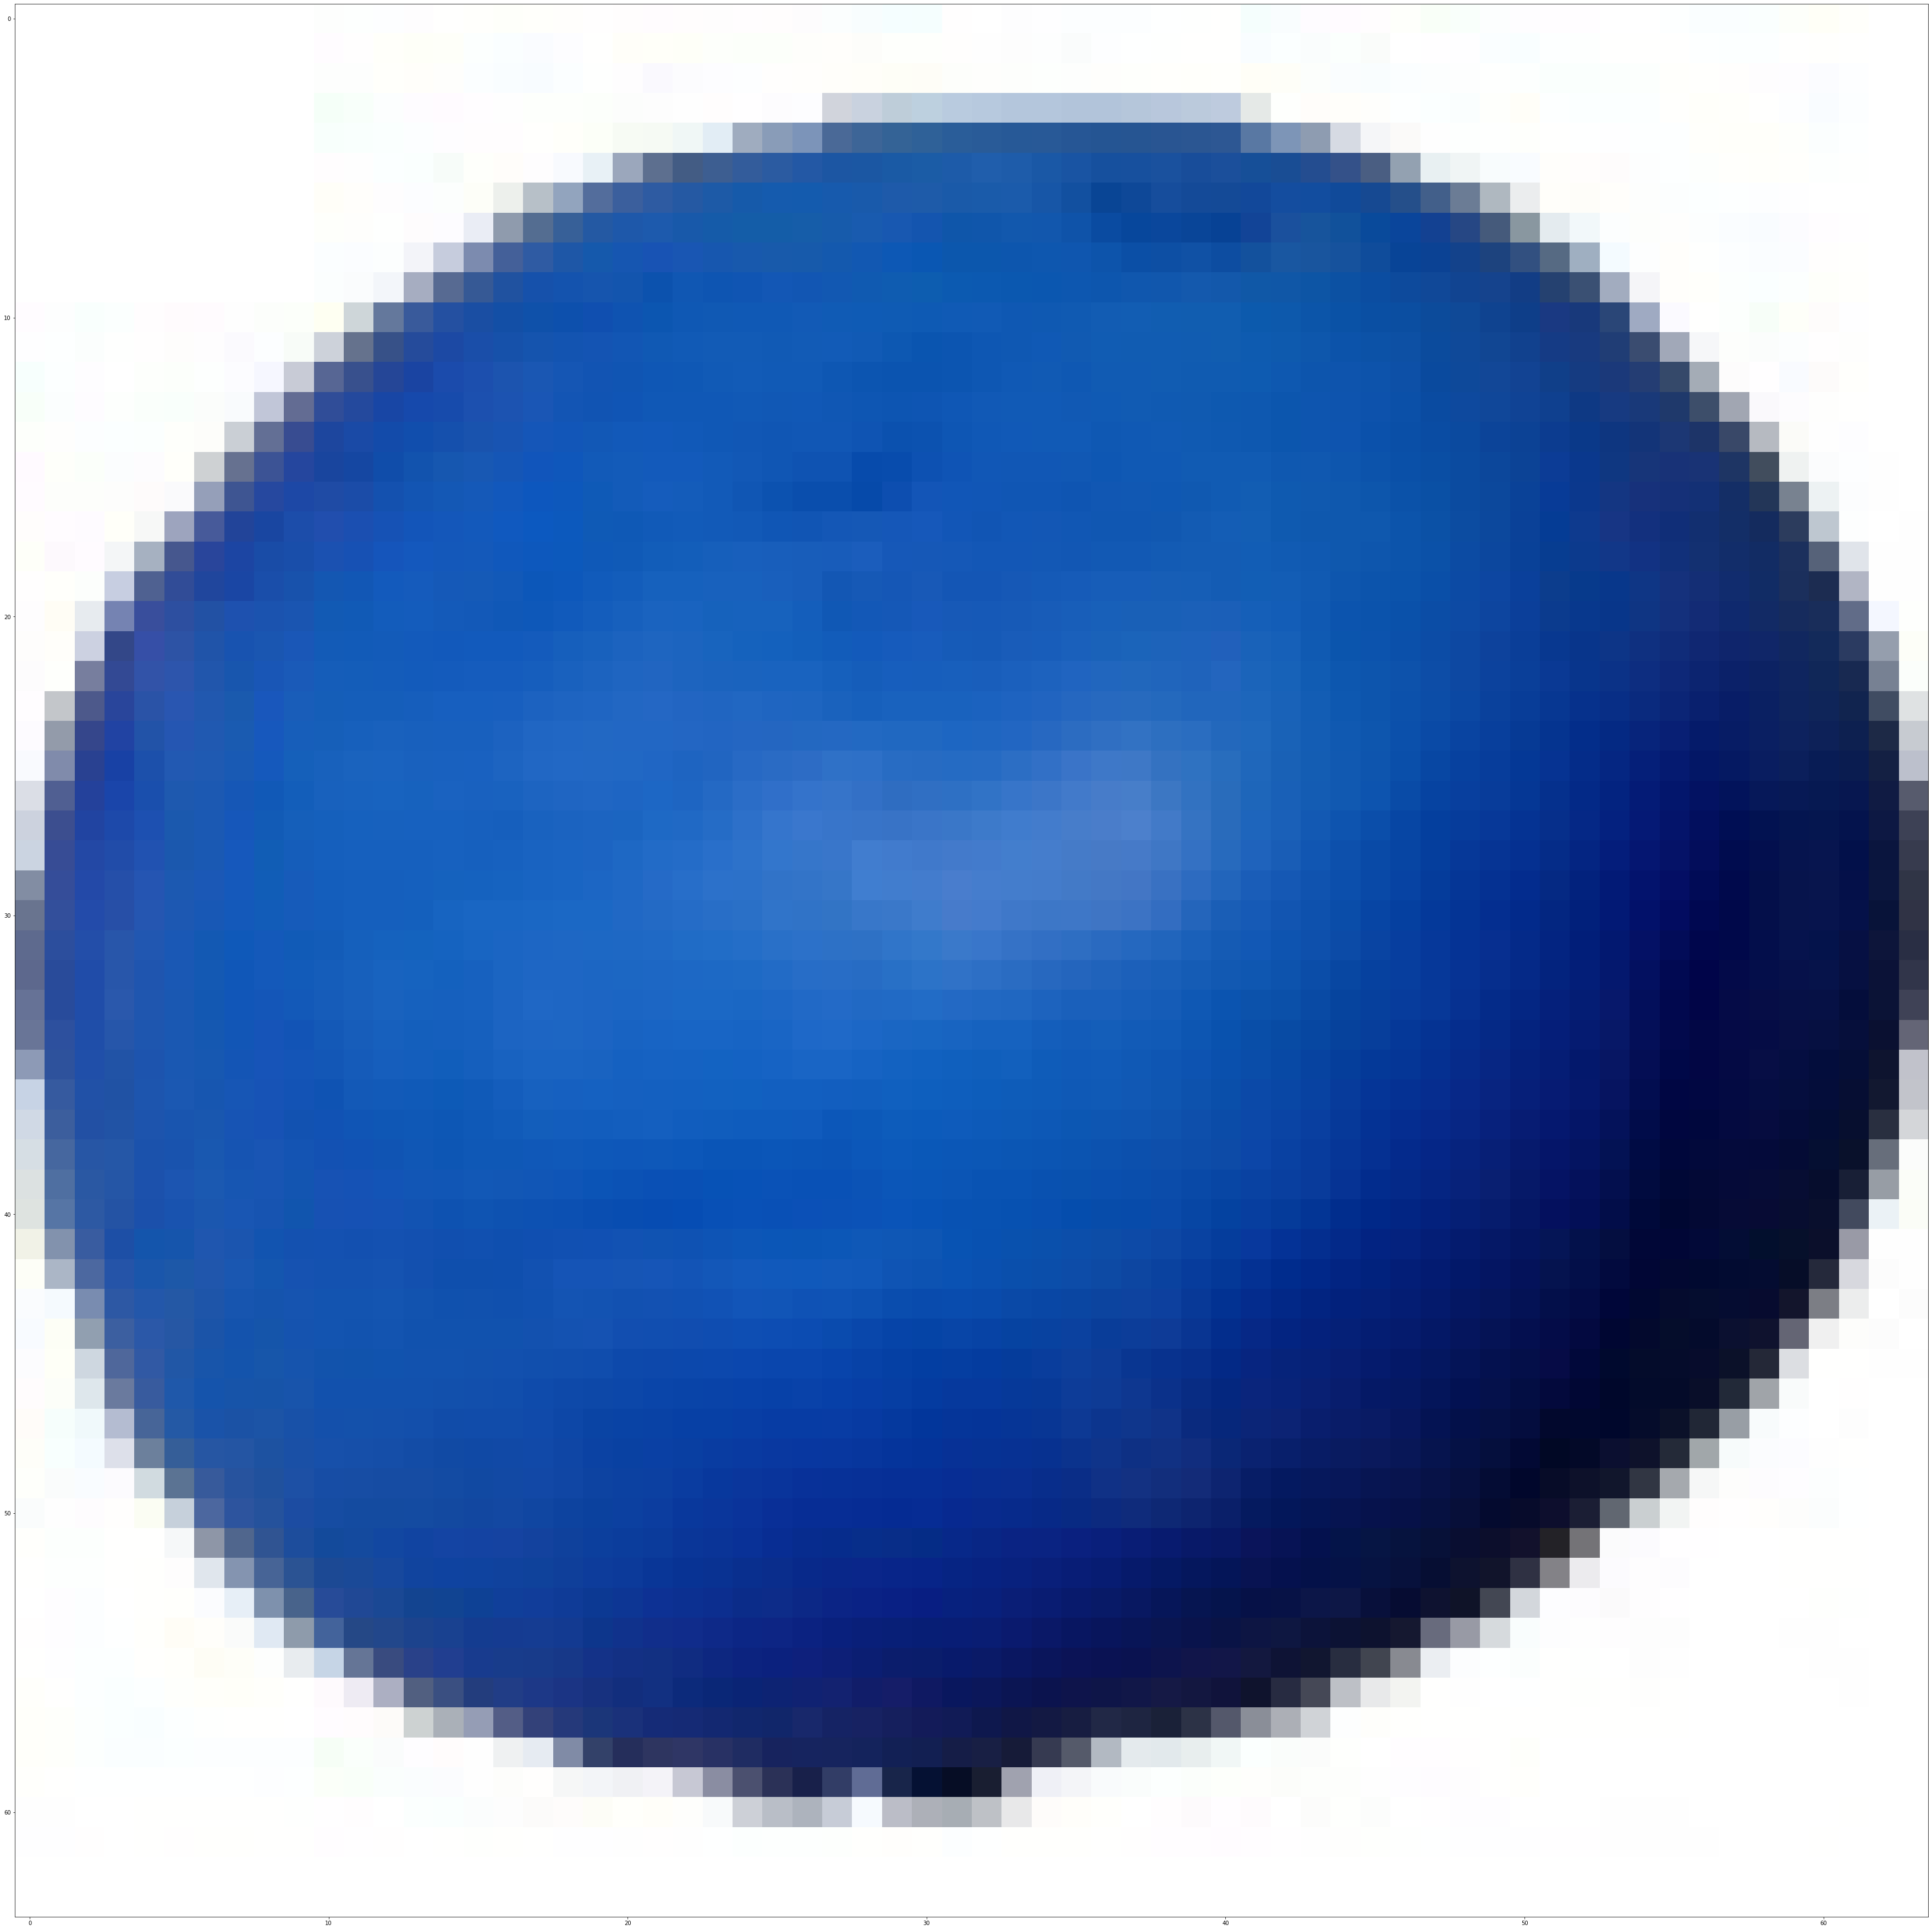

In [ ]:
#Hiển thị ngẫu nhiên 1 dữ liệu
plt.figure(figsize=(64, 64))
plt.imshow(X_train[random.randint(0,len(X_train))])

In [ ]:
# Hàm dùng để chuẩn hoá dữ liệu ảnh
def convertImage(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img /255
    
    return img

In [ ]:
# Chuẩn hoá dữ liệu (Normalize the data)
X_train = np.array(list(map(convertImage, X_train)))
X_test = np.array(list(map(convertImage, X_test)))

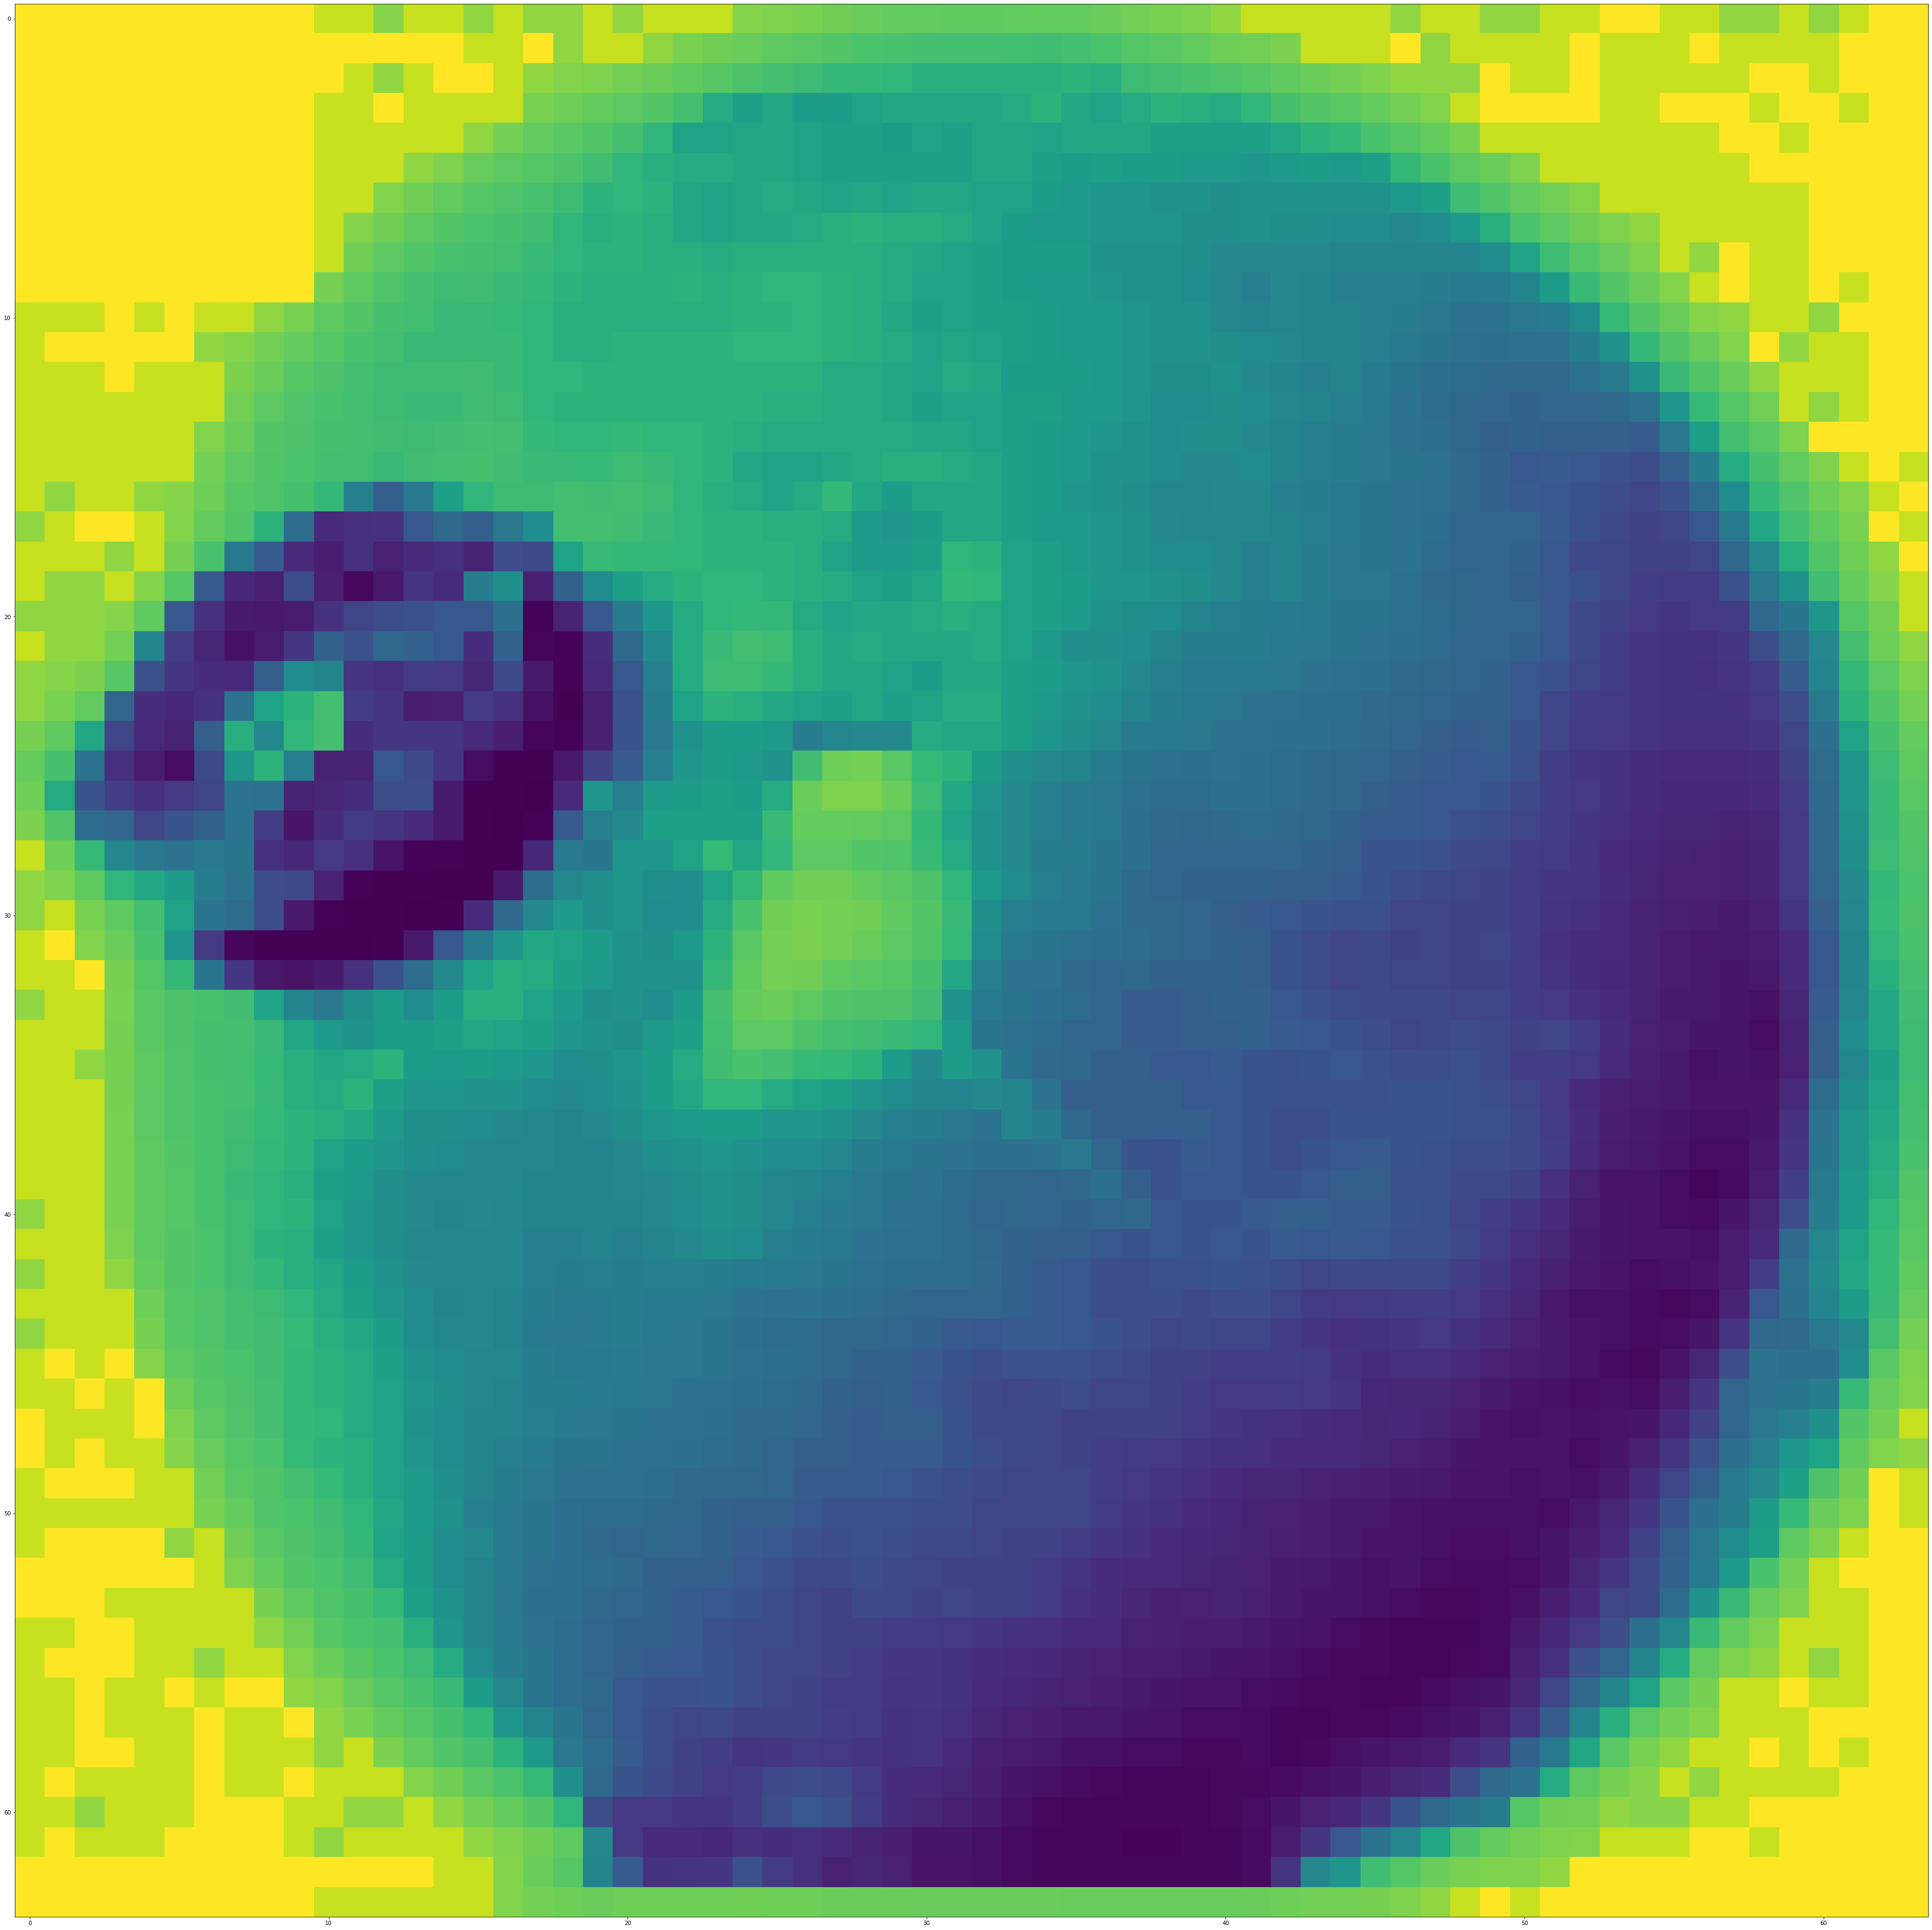

In [ ]:
# Hiển thị ngẫu nhiên 1 dữ liệu đã chuẩn hoá
plt.figure(figsize=(64, 64))
plt.imshow(X_train[random.randint(0,len(X_train))])

In [ ]:
# Reshape data để phù hợp với Input_shape của Model
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

In [ ]:
#Create model
from keras.models import Sequential
from keras.layers import Dense,Flatten
model = Sequential()
model.add(Flatten(input_shape=(64,64,1)))
model.add(Dense(units=1024, activation = "relu"))
model.add(Dense(units=512, activation = "relu"))
model.add(Dense(units=131, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4195328   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 131)               67203     
Total params: 4,787,331
Trainable params: 4,787,331
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Huấn luyện model
hist = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test))

Epoch 1/10
1693/1693 [==============================] - 78s 37ms/step - loss: 3.1665 - accuracy: 0.2426 - val_loss: 0.9324 - val_accuracy: 0.7063
Epoch 2/10
1693/1693 [==============================] - 63s 37ms/step - loss: 0.6641 - accuracy: 0.7930 - val_loss: 0.3426 - val_accuracy: 0.8885
Epoch 3/10
1693/1693 [==============================] - 63s 37ms/step - loss: 0.3196 - accuracy: 0.8982 - val_loss: 0.2121 - val_accuracy: 0.9302
Epoch 4/10
1693/1693 [==============================] - 64s 38ms/step - loss: 0.2182 - accuracy: 0.9262 - val_loss: 0.1573 - val_accuracy: 0.9501
Epoch 5/10
1693/1693 [==============================] - 63s 37ms/step - loss: 0.1800 - accuracy: 0.9422 - val_loss: 0.3531 - val_accuracy: 0.8938
Epoch 6/10
1693/1693 [==============================] - 63s 37ms/step - loss: 0.1661 - accuracy: 0.9480 - val_loss: 0.1105 - val_accuracy: 0.9640
Epoch 7/10
1693/1693 [==============================] - 63s 37ms/step - loss: 0.1433 - accuracy: 0.9544 - val_loss: 0.1530 -

(22688, 64, 64, 3)
(22688, 131)
131
True Class:  Grape White 3
Predicted Class:  Grape White 3


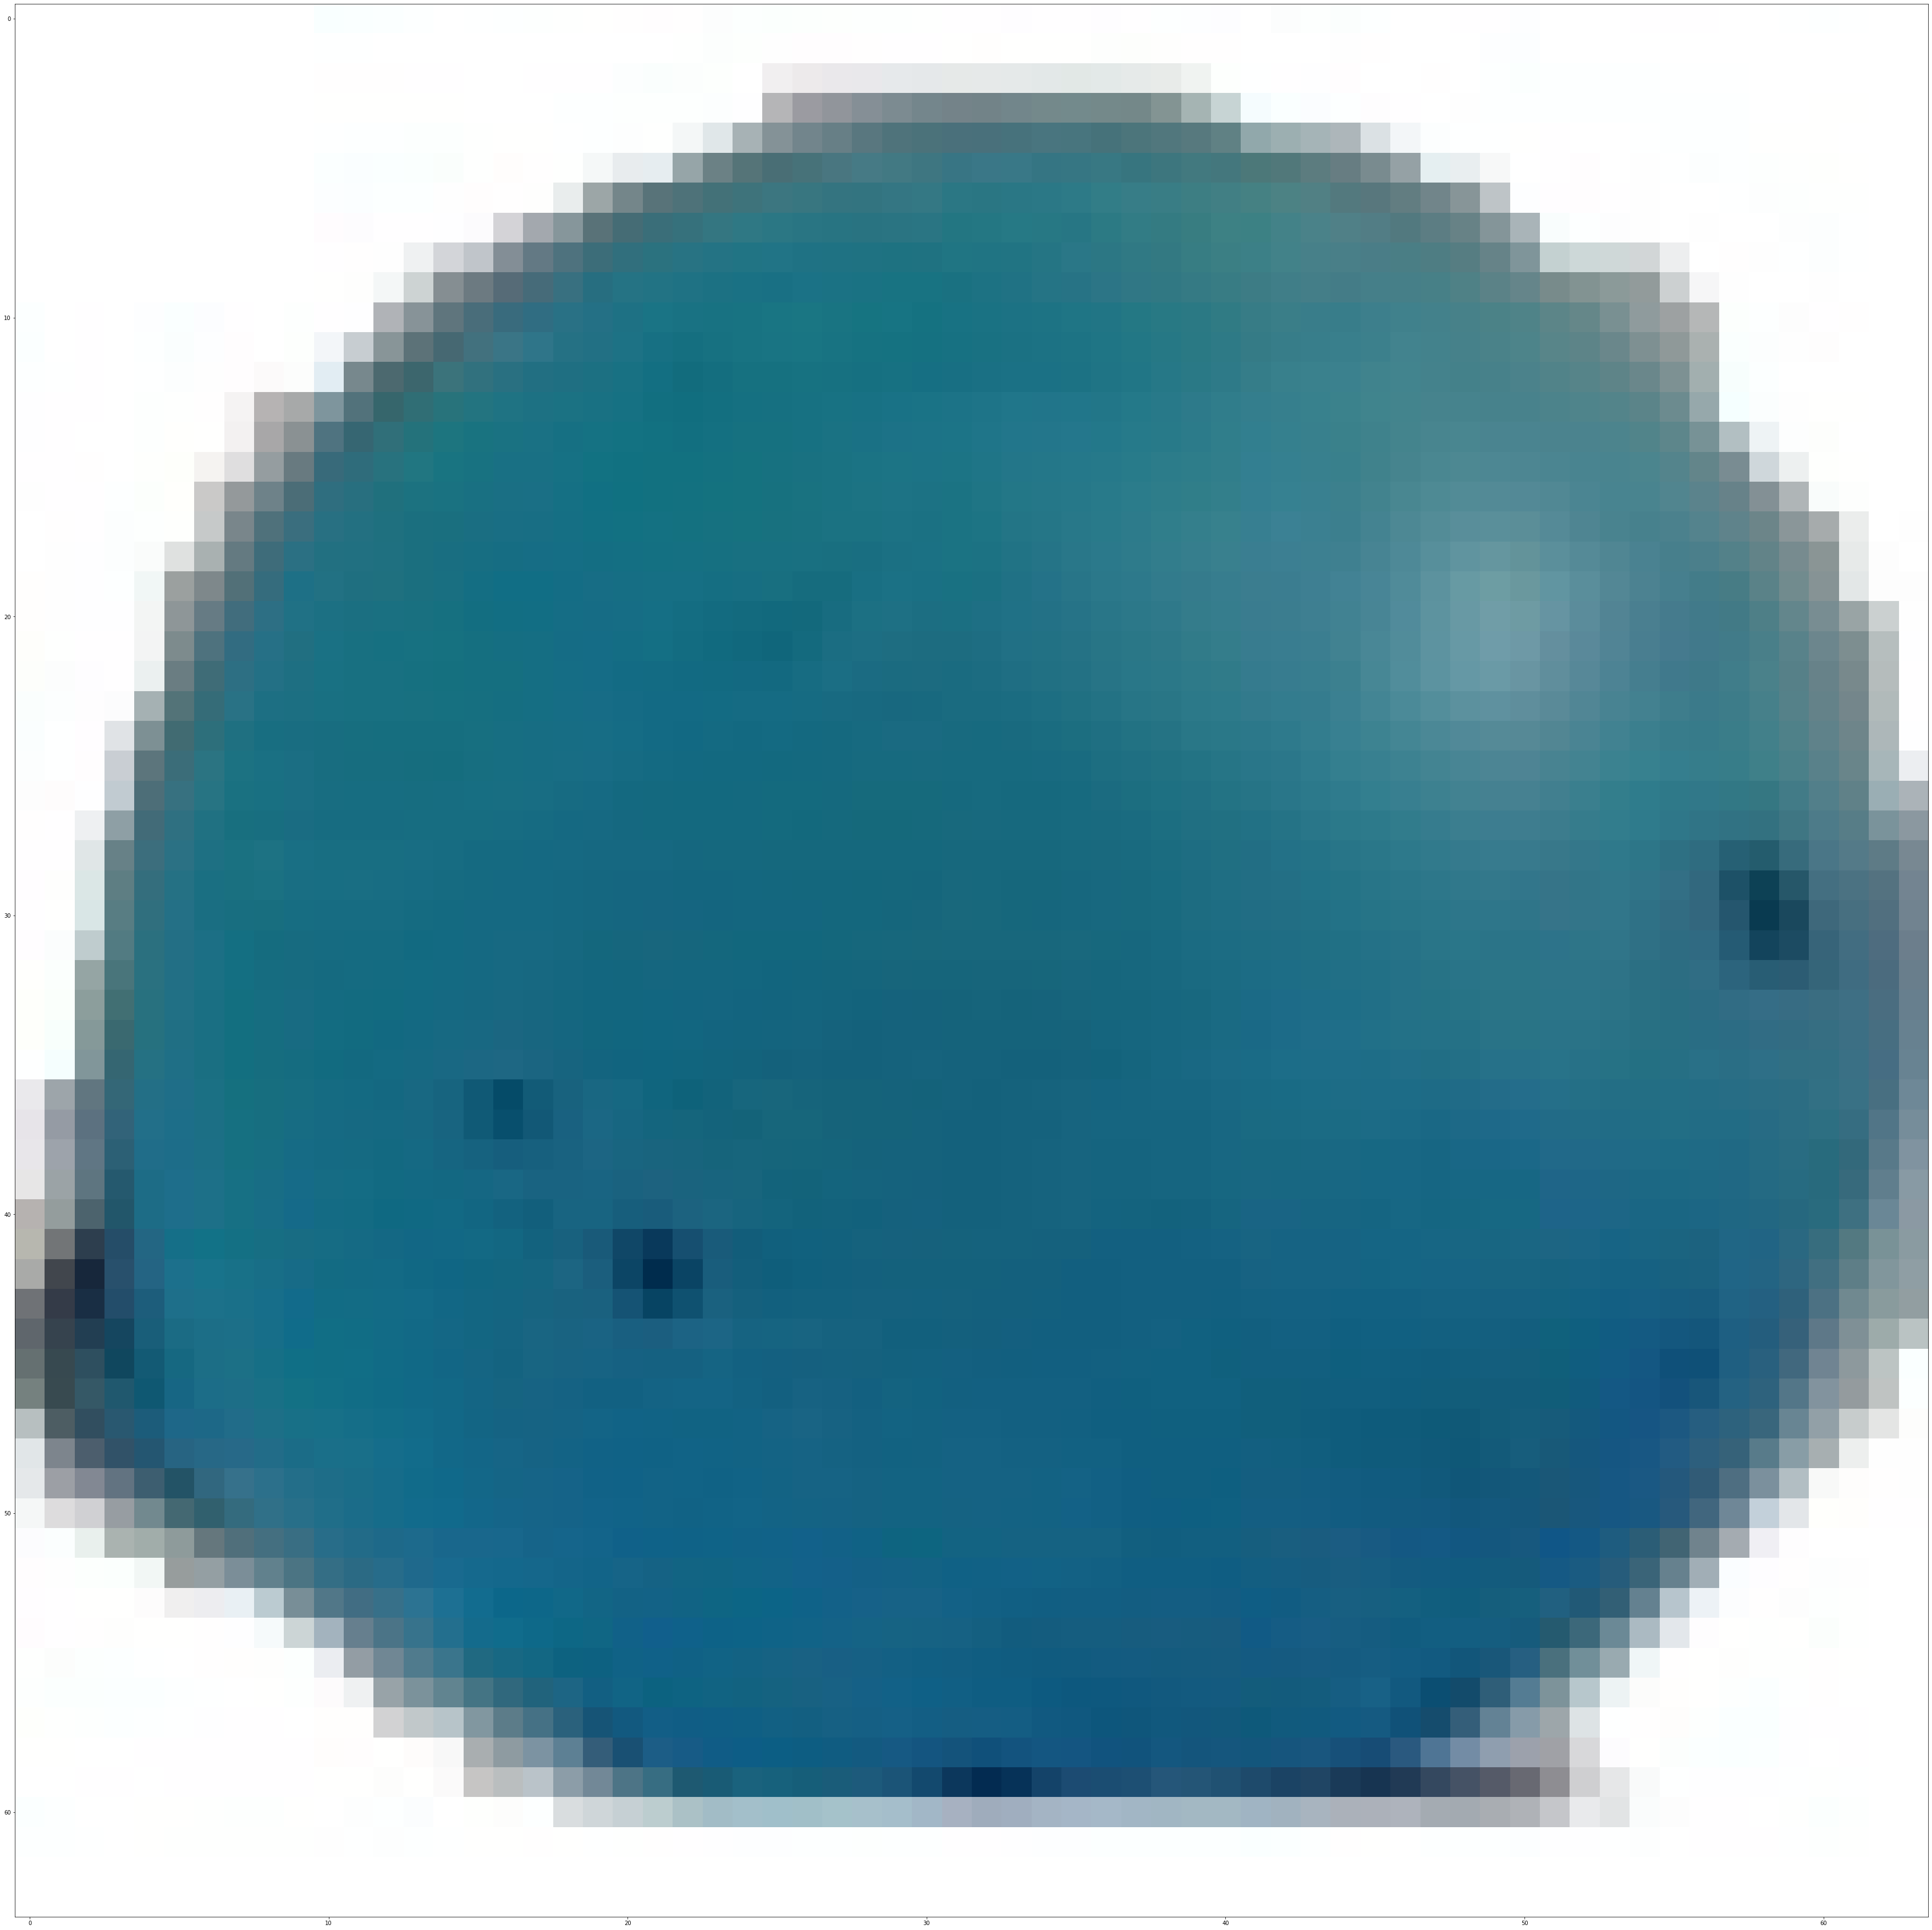

In [ ]:
# Load lại test data để model thử predict
X_pred, y_pred = load_test_data()
class_pred = load_class()

# num to predict
num = random.randint(0,len(X_pred))
# Hiển thị hình ảnh predict
plt.figure(figsize=(64, 64))
plt.imshow(X_pred[num])

# Chuẩn hoá dữ liệu predict
X_pred = np.array(list(map(convertImage, X_pred)))

# Predict
X_pred = X_pred.reshape(-1, 64, 64, 1)
y_pred_by_model = model.predict(X_pred[num-1:num])
print('True Class: ', class_pred[np.argmax(y_pred[num])])
print('Predicted Class: ', class_pred[np.argmax(y_pred_by_model)])